<a href="https://colab.research.google.com/github/rtorresc/SecQuilla/blob/main/SecQuilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import geemap
import pandas as pd
import geopandas as gpd
import ee
ee.Authenticate()
ee.Initialize()

KeyboardInterrupt: ignored

In [ ]:
#geemap.update_package()

In [ ]:
Map = geemap.Map(center=[10.96, -74.75], zoom=12.498)
Map

In [ ]:
gdf = gpd.read_file(
     "/content/Barrios de Barranquilla según POT.geojson"
)
gdf.head()

NameError: ignored

# Distribución de indices de inseguridad

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
datos = pd.read_csv("/content/Seguridad_Colombia.csv")
datos.head()

,ANIO,BARRIO,DEPTO,MUNICIPIO,CANTIDAD,TIPO_VIOLENCIA
0,2015,20 DE JULIO,ATLÁNTICO,BARANOA,1,AMENAZAS
1,2015,20 DE JULIO,ATLÁNTICO,BARRANQUILLA (CT),2,AMENAZAS
2,2015,7 DE ABRIL,ATLÁNTICO,BARRANQUILLA (CT),9,AMENAZAS
3,2015,7 DE AGOSTO,ATLÁNTICO,BARRANQUILLA (CT),4,AMENAZAS
4,2015,ABAJO,ATLÁNTICO,BARRANQUILLA (CT),5,AMENAZAS


In [70]:
df=pd.DataFrame(datos)
df

,ANIO,BARRIO,DEPTO,MUNICIPIO,CANTIDAD,TIPO_VIOLENCIA
0,2015,20 DE JULIO,ATLÁNTICO,BARANOA,1,AMENAZAS
1,2015,20 DE JULIO,ATLÁNTICO,BARRANQUILLA (CT),2,AMENAZAS
2,2015,7 DE ABRIL,ATLÁNTICO,BARRANQUILLA (CT),9,AMENAZAS
3,2015,7 DE AGOSTO,ATLÁNTICO,BARRANQUILLA (CT),4,AMENAZAS
4,2015,ABAJO,ATLÁNTICO,BARRANQUILLA (CT),5,AMENAZAS
...,...,...,...,...,...,...
30051,2022,ZONA RURAL,ATLÁNTICO,SABANAGRANDE,3,LESIONES PERSONALES
30052,2022,ZONA RURAL,ATLÁNTICO,SABANALARGA,6,LESIONES PERSONALES
30053,2022,ZONA RURAL,ATLÁNTICO,TUBARÁ,1,LESIONES PERSONALES
30054,2022,ZONA RURAL,ATLÁNTICO,USIACURÍ,4,LESIONES PERSONALES


In [117]:
df_group = df.groupby(["ANIO","TIPO_VIOLENCIA"]).sum()
df_group = df_group.reset_index()
df_group

,ANIO,TIPO_VIOLENCIA,CANTIDAD
0,2015,AMENAZAS,2713
1,2015,DELITOS SEXUALES,887
2,2015,HOMICIDIO ATENTADO,568
3,2015,HURTO AUTOMOTORES,300
4,2015,HURTO COMERCIO,687
...,...,...,...
86,2022,HURTO RESIDENCIAS,785
87,2022,INTRAFAMILIAR,3233
88,2022,LESIONES ACCIDENTES DE TRANSITO,1404
89,2022,LESIONES PERSONALES,3968


In [118]:
df_group = pd.pivot_table(df_group, columns="TIPO_VIOLENCIA", index="ANIO", values="CANTIDAD")
df_group

TIPO_VIOLENCIA,AMENAZAS,DELITOS SEXUALES,HOMICIDIO ATENTADO,HURTO AUTOMOTORES,HURTO COMERCIO,HURTO MOTOCICLETAS,HURTO PERSONAS,HURTO RESIDENCIAS,INTRAFAMILIAR,LESIONES ACCIDENTES DE TRANSITO,LESIONES PERSONALES,TERRORISMO
ANIO,,,,,,,,,,,,
2015,2713.0,887.0,568.0,300.0,687.0,1255.0,5581.0,695.0,3122.0,2041.0,3639.0,NaN
2016,2600.0,983.0,550.0,280.0,773.0,1540.0,6750.0,641.0,3142.0,2648.0,4800.0,NaN
2017,2075.0,1210.0,559.0,398.0,2776.0,1579.0,9259.0,1366.0,2703.0,2587.0,5329.0,NaN
2018,2288.0,1754.0,548.0,321.0,3412.0,1352.0,12880.0,1516.0,2627.0,1133.0,6486.0,2.0
2019,1787.0,2026.0,518.0,312.0,2683.0,1664.0,15114.0,1537.0,3161.0,671.0,5716.0,NaN
2020,1677.0,1271.0,529.0,294.0,1913.0,1375.0,11489.0,1084.0,2862.0,555.0,3301.0,1.0
2021,3697.0,1377.0,713.0,561.0,2057.0,2309.0,14672.0,1071.0,3668.0,452.0,4555.0,NaN
2022,2970.0,786.0,539.0,457.0,1461.0,1576.0,14585.0,785.0,3233.0,1404.0,3968.0,1.0


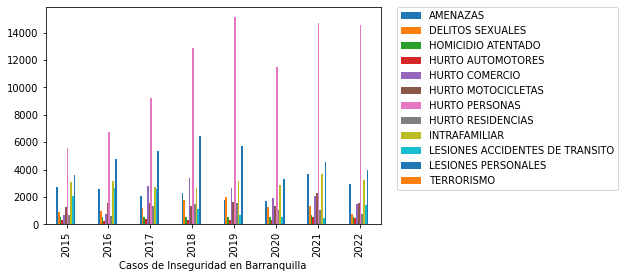

In [127]:
df_group.plot(kind="bar", xlabel="Casos de Inseguridad en Barranquilla")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)